In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/originaldatastockbob/original.csv


In [2]:
from numpy import loadtxt
df = loadtxt('../input/originaldatastockbob/original.csv', delimiter=',')
print(f"df -- {df.shape}")

df -- (1232,)


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df = scaler.fit_transform(np.array(df).reshape(-1,1))

print(new_df)

[[0.67158554]
 [0.68383042]
 [0.699843  ]
 ...
 [0.28069072]
 [0.28445842]
 [0.28477236]]


In [4]:
training_size=int(len(new_df)*0.67)
test_size=len(new_df)-training_size
train_data,test_data=new_df[0:training_size,:],new_df[training_size:len(new_df),:1]

print(train_data.shape)
print(test_data.shape)

(825, 1)
(407, 1)


In [5]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
time_step=100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(724, 100) (724,) (306, 100) (306,)


In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print(X_train.shape, X_test.shape)

(724, 100, 1) (306, 100, 1)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X_train,Y_train,validation_data=(X_test, Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 348ms/step - loss: 0.2947 - val_loss: 0.0200
Epoch 2/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0207 - val_loss: 0.0388
Epoch 3/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0130 - val_loss: 0.0198
Epoch 4/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0092 - val_loss: 0.0273
Epoch 5/100
12/12 [==============================] - 2s 204ms/step - loss: 0.0073 - val_loss: 0.0218
Epoch 6/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0061 - val_loss: 0.0152
Epoch 7/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0056 - val_loss: 0.0122
Epoch 8/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0049 - val_loss: 0.0085
Epoch 9/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0044 - val_loss: 0.0063
Epoch 10/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0043 - val_lo

In [10]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
print(train_predict.shape, test_predict.shape)

(724, 1) (306, 1)


In [11]:

obj = scaler.fit(np.array(new_df).reshape(-1,1))
train_predict=obj.inverse_transform(train_predict)
test_predict=obj.inverse_transform(test_predict)

In [12]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

0.034927433519148655

In [13]:
math.sqrt(mean_squared_error(Y_test,test_predict))

0.04089513294109217

In [14]:
X = scaler.fit_transform(np.array(new_df).reshape(-1,1))

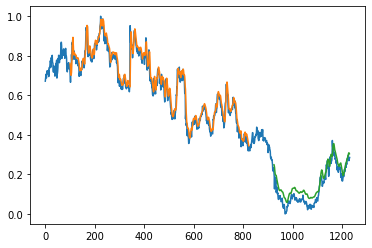

In [15]:
import matplotlib.pyplot as plt

look_back=100
trainPredictPlot = np.empty_like(X)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(X)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(X)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(X))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [16]:

len(test_data)

407

In [17]:

x_input=test_data[307:].reshape(1,-1)
x_input.shape

(1, 100)

In [18]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [19]:
temp_input

[0.18618525588697019,
 0.182417601255887,
 0.17425431711145997,
 0.21507064364207218,
 0.2433281004709576,
 0.24929354474097326,
 0.24270016954474094,
 0.2295133626373626,
 0.24646781789638927,
 0.2697017080062794,
 0.24992152590266875,
 0.23139716169544738,
 0.23453687912087906,
 0.23579279748822607,
 0.1899529042386185,
 0.1981161883830455,
 0.23485087598116167,
 0.2395604521193092,
 0.2549450423861852,
 0.2860282762951334,
 0.28885400313971743,
 0.27912086028257455,
 0.27441128414442695,
 0.2712715667189952,
 0.25557297959183667,
 0.2627943359497645,
 0.2703296891679749,
 0.2712715667189952,
 0.2995290235478807,
 0.37142858398744116,
 0.3434850675039246,
 0.33312403767660914,
 0.31616953218210353,
 0.3255886844583987,
 0.33563577394034527,
 0.307064376766091,
 0.29419151020408163,
 0.2938775698587127,
 0.3083202386185243,
 0.30957615698587126,
 0.27723706122448977,
 0.2806907189952904,
 0.27503926530612244,
 0.2731554160125589,
 0.25651490109890107,
 0.2659340533751962,
 0.265934053

In [20]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.30159435]
101
1 day input [0.1824176  0.17425432 0.21507064 0.2433281  0.24929354 0.24270017
 0.22951336 0.24646782 0.26970171 0.24992153 0.23139716 0.23453688
 0.2357928  0.1899529  0.19811619 0.23485088 0.23956045 0.25494504
 0.28602828 0.288854   0.27912086 0.27441128 0.27127157 0.25557298
 0.26279434 0.27032969 0.27127157 0.29952902 0.37142858 0.34348507
 0.33312404 0.31616953 0.32558868 0.33563577 0.30706438 0.29419151
 0.29387757 0.30832024 0.30957616 0.27723706 0.28069072 0.27503927
 0.27315542 0.2565149  0.26593405 0.26593405 0.24081631 0.22260595
 0.23359496 0.22574566 0.23704867 0.22166407 0.21067506 0.21507064
 0.2244898  0.23610674 0.24552589 0.22731552 0.22825744 0.23610674
 0.23233909 0.23547881 0.18587126 0.2034537  0.19968605 0.19372055
 0.17142857 0.16797488 0.16671899 0.16609106 0.16985871 0.18084774
 0.19623234 0.19058084 0.1899529  0.18932497 0.21287285 0.22511773
 0.21444271 0.21381478 0.2320251  0.2357928  0.2568289  0.23547881
 0.25494504 0.25274725 0.25243326

In [21]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [22]:
len(new_df)

1232

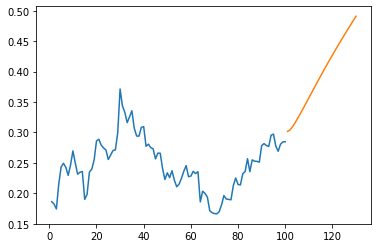

In [23]:
plt.plot(day_new,scaler.inverse_transform(new_df[1132:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

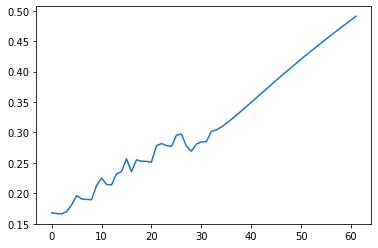

In [24]:
df1=new_df.tolist()
df1.extend(lst_output)
plt.plot(df1[1200:])

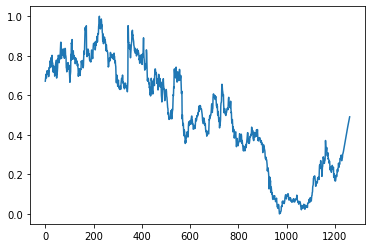

In [25]:
df1=scaler.inverse_transform(df1).tolist()
plt.plot(df1)